In [ ]:
#importando as bibliotecas
import pandas as pd  #biblioteca utilizada para criar os dataframes
import numpy as np  #biblioteca utilizada para trabalhar com vetores ou matrizes
import matplotlib.pyplot as plt #biblioteca utilizada para construção de gráficos
from sklearn.cluster import KMeans #biblioteca utilizada para a construção K-means
from sklearn.decomposition import PCA #biblioteca utilizada para a construção do PCA
from sklearn.preprocessing import MinMaxScaler #biblioteca utilizada para a normalização dos dados
import seaborn as sns #biblioteca utilizada para o plot dos gráficos de forma mais "bonita"

In [ ]:
#upload do dataset
df_clientes = pd.read_csv('Mall_Customers.csv')

In [ ]:
df_clientes.head() #mostrandos as 5 primeiras linhas do dataframe

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40




*  **CustomerID** = Identificação única de um cliente
*  **Gender** = Gênero do cliente
*  **Age** = Idade do consumidor
* **Annual Income** = Renda anual do cliente
* **Spending Score** = 
Pontuação atribuída pelo shopping com base no comportamento do cliente e na natureza do gasto




# **Conhecendo os Dados**

In [ ]:
df_clientes.info()  #explorando os dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
#verificando a existência de valores nulos
df_clientes.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
#encontrando as estatísticas descritivas do dataset
df_clientes.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


* **count** = número de elementos (linhas) existente no banco de dados
* **mean** = média dos valores na coluna
* **std** = desvio padrão dos dados presentes na coluna
* **min** = menor valor existente na coluna
* **25%** = primeiro quartil dos dados (25%)
* **50%** = segundo quartil dos dados (50%)
* **75%** = terceiro quartil dos dados (75%)
* **max** = valor máximo existente na coluna 

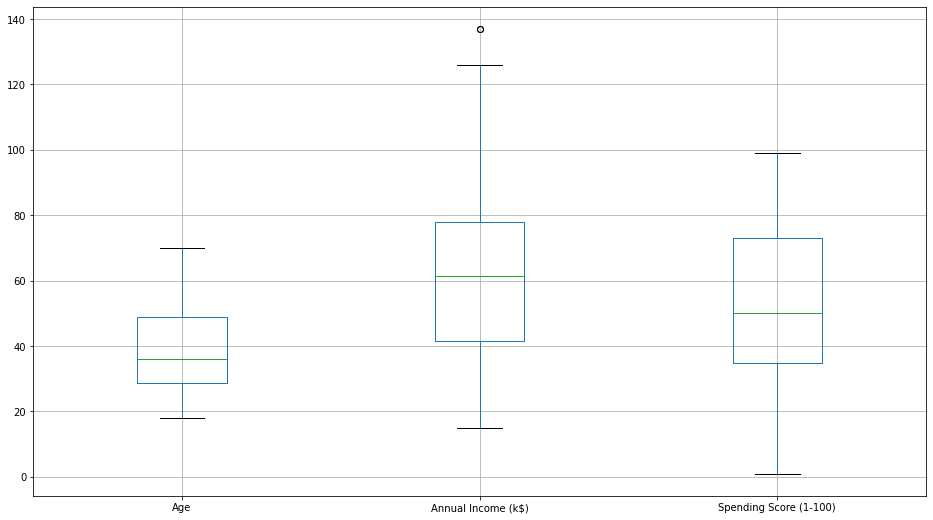

In [ ]:
#verificando a existência de outliers
plt.rcParams["figure.figsize"] = [16, 9]
boxplot = df_clientes.boxplot(column=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])  #constroi o boxplot para as colunas desejadas

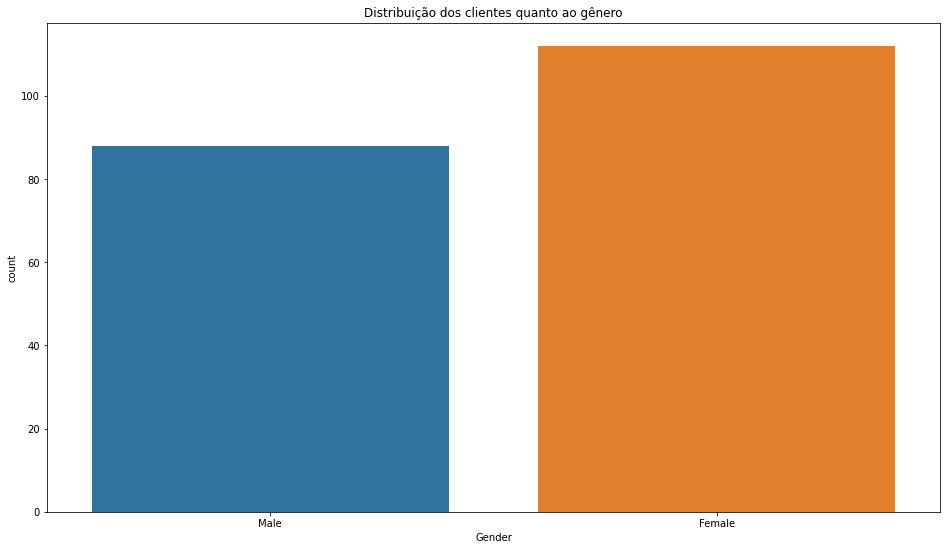

In [ ]:
#analisando a distribuição dos clientes por gênero
plt.rcParams["figure.figsize"] = [16, 9]
sns.countplot(x='Gender', data=df_clientes); # cria o gráfico que conta a quantidade de consumidores existente em cada um dos gêneros
plt.title('Distribuição dos clientes quanto ao gênero');  #adiciona o título no gráfico

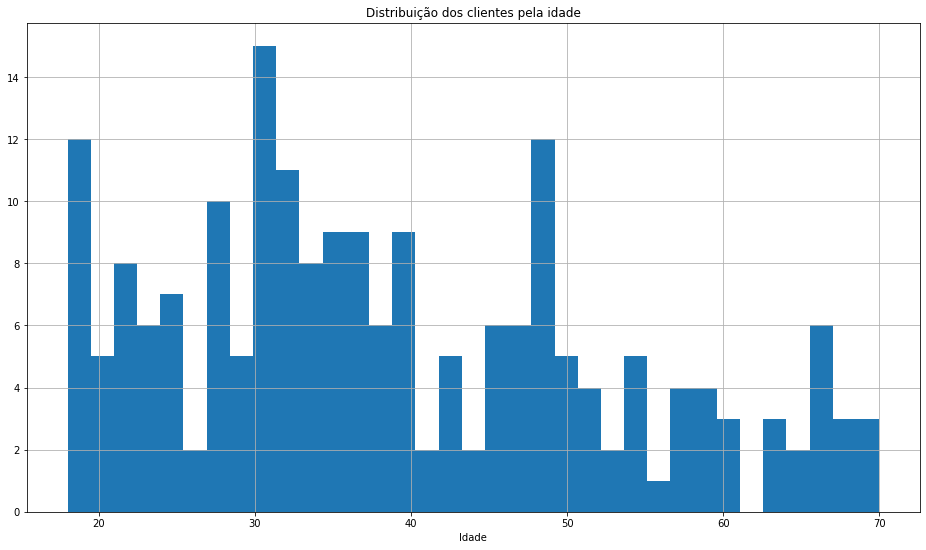

In [ ]:
#analisando a distribuição dos clientes quanto a idade através do histograma
df_clientes.hist('Age', bins=35);  #seleciona a coluna idade para realizar o histograma
                                 # os "bins" indicam a quantidade de grupos que se deseja dividir os dados
plt.title('Distribuição dos clientes pela idade');# adiciona o título ao gráfico (histograma)
plt.xlabel('Idade');

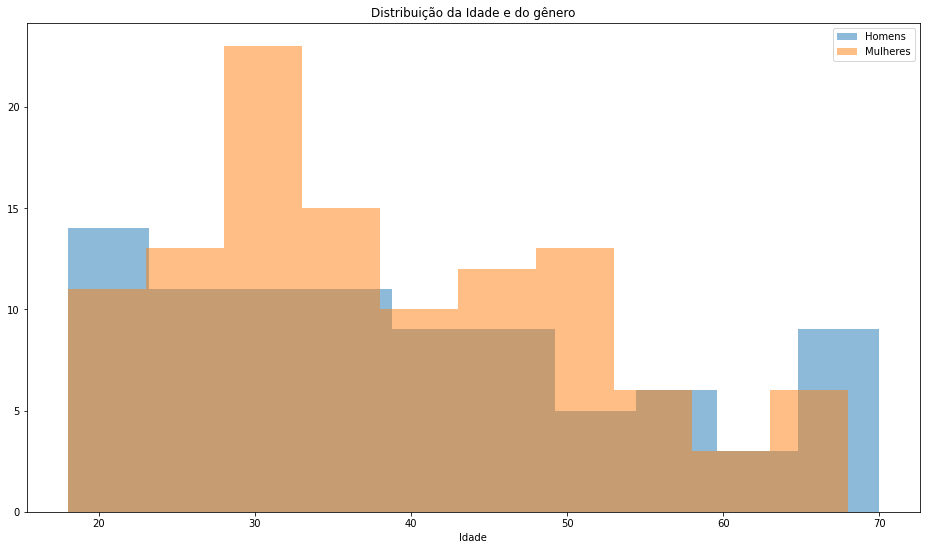

In [ ]:
homens=df_clientes[df_clientes['Gender'] == 'Male'] #seleciona apenas os homens do banco de dados
mulheres= df_clientes[df_clientes['Gender'] == 'Female'] #seleciona apenas as mulheres no banco de dados
plt.hist('Age', data=homens, alpha=0.5, label='Homens'); #cria o histograma apenas da idade dos homens
plt.hist('Age', data=mulheres, alpha=0.5, label='Mulheres'); #cria o histograma apenas para a idade das mulheres
plt.title('Distribuição da Idade e do gênero'); #adicionao título ao gráfico
plt.xlabel('Idade'); # adiciona o label para o eixo x
plt.legend(); #adiciona a legenda

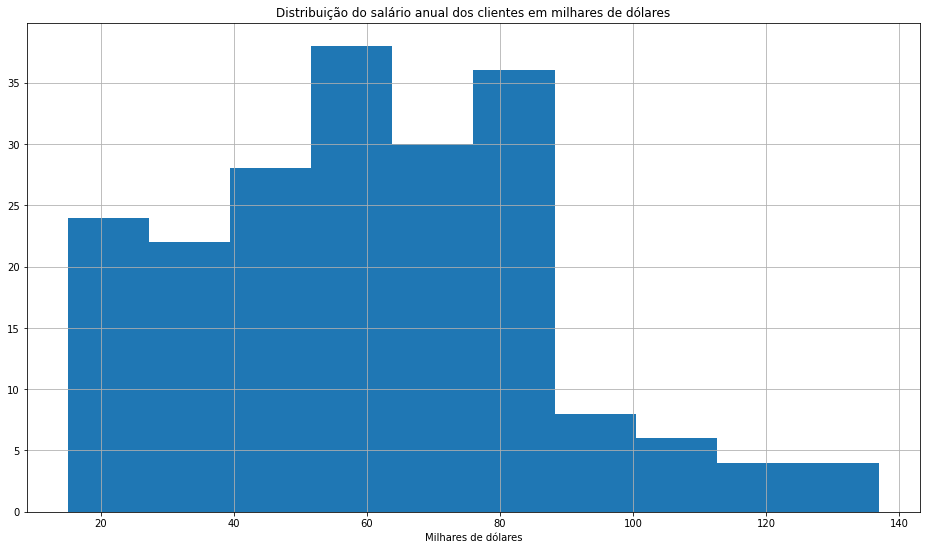

In [ ]:
df_clientes.hist('Annual Income (k$)');  #criando um histograma para os salários anuais recebidos pelos consumidores
plt.title('Distribuição do salário anual dos clientes em milhares de dólares'); #adiciona o título no gráfico
plt.xlabel('Milhares de dólares'); # adiciona o label do eixo X

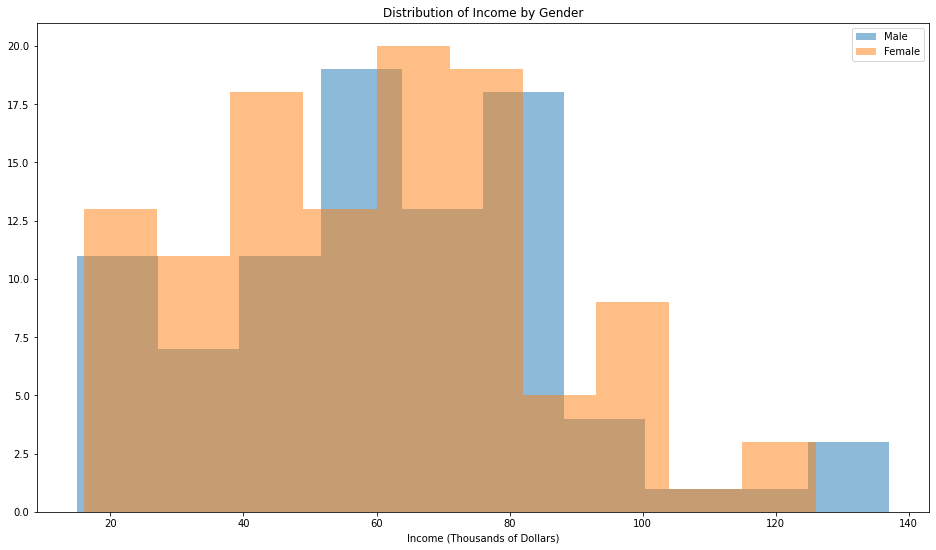

In [ ]:
homens=df_clientes[df_clientes['Gender'] == 'Male']
mulheres=df_clientes[df_clientes['Gender'] == 'Female']
plt.hist('Annual Income (k$)', data=homens, alpha=0.5, label='Male');
plt.hist('Annual Income (k$)', data=mulheres, alpha=0.5, label='Female');
plt.title('Distribution of Income by Gender');
plt.xlabel('Income (Thousands of Dollars)');
plt.legend();

In [ ]:
# cria o banco de dados apenas para os consumidadores masculinos e femininos
male_customers = df_clientes[df_clientes['Gender'] == 'Male'] #obtém apenas os consumidores homens
female_customers = df_clientes[df_clientes['Gender'] == 'Female'] #obtém apenas as consumidoras mulheres

# obtém os valores médios atribuídos a cada um dos sexos
print('Nota média atribuída aos homens: ',male_customers['Spending Score (1-100)'].mean()) #imprime o valor médio para os homens
print('Nota média atribuída às mulheres: ',female_customers['Spending Score (1-100)'].mean()) #imprime o valor média para as mulheres

Nota média atribuída aos homens:  48.51136363636363
Nota média atribuída às mulheres:  51.526785714285715


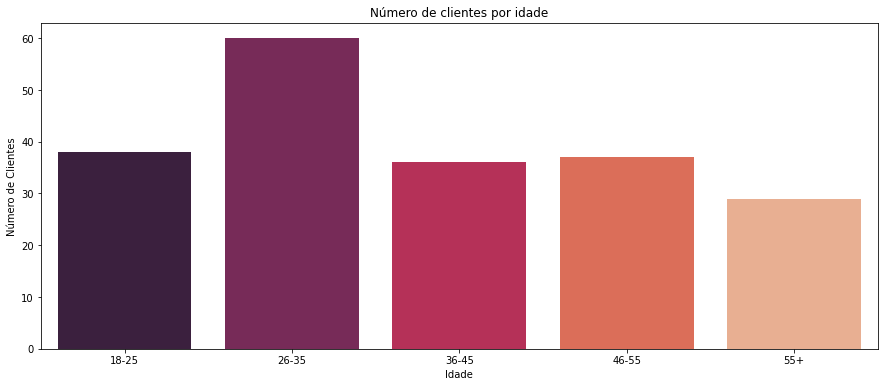

In [ ]:
#separando os clientes em grupos
age18_25 = df_clientes.Age[(df_clientes.Age <= 25) & (df_clientes.Age >= 18)]
age26_35 = df_clientes.Age[(df_clientes.Age <= 35) & (df_clientes.Age >= 26)]
age36_45 = df_clientes.Age[(df_clientes.Age <= 45) & (df_clientes.Age >= 36)]
age46_55 = df_clientes.Age[(df_clientes.Age <= 55) & (df_clientes.Age >= 46)]
age55above = df_clientes.Age[df_clientes.Age >= 56]

#criando os labels
x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]

#realizando o plot da figura
plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Número de clientes por idade")
plt.xlabel("Idade")
plt.ylabel("Número de Clientes")
plt.show()

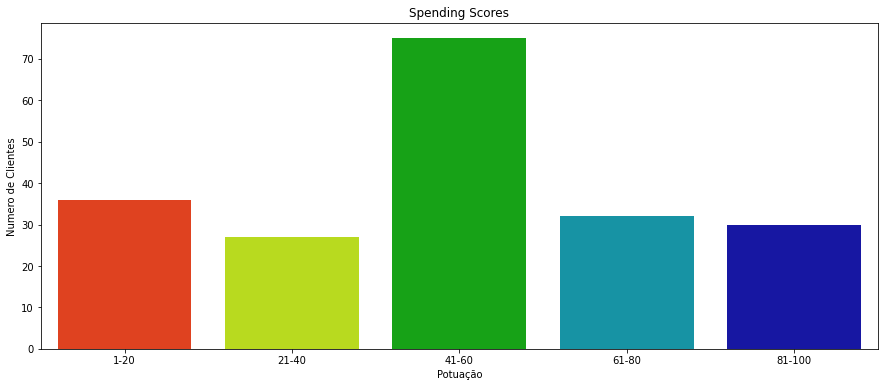

In [ ]:
#separando os clientes via nota atribuída pelo shopping
ss1_20 = df_clientes["Spending Score (1-100)"][(df_clientes["Spending Score (1-100)"] >= 1) & (df_clientes["Spending Score (1-100)"] <= 20)]
ss21_40 = df_clientes["Spending Score (1-100)"][(df_clientes["Spending Score (1-100)"] >= 21) & (df_clientes["Spending Score (1-100)"] <= 40)]
ss41_60 = df_clientes["Spending Score (1-100)"][(df_clientes["Spending Score (1-100)"] >= 41) & (df_clientes["Spending Score (1-100)"] <= 60)]
ss61_80 = df_clientes["Spending Score (1-100)"][(df_clientes["Spending Score (1-100)"] >= 61) & (df_clientes["Spending Score (1-100)"] <= 80)]
ss81_100 = df_clientes["Spending Score (1-100)"][(df_clientes["Spending Score (1-100)"] >= 81) & (df_clientes["Spending Score (1-100)"] <= 100)]

#definindo os valores de idades
ssx = ["1-20", "21-40", "41-60", "61-80", "81-100"]
ssy = [len(ss1_20.values), len(ss21_40.values), len(ss41_60.values), len(ss61_80.values), len(ss81_100.values)]

#realizando o plot da figura
plt.figure(figsize=(15,6))
sns.barplot(x=ssx, y=ssy, palette="nipy_spectral_r")
plt.title("Spending Scores")
plt.xlabel("Potuação")
plt.ylabel("Numero de Clientes")
plt.show()

# **Preparando os Dados**

In [ ]:
#aplicando o label encoding
df_clientes["Gender"]=pd.Categorical(df_clientes["Gender"])  #transformando em dados categóricos
df_clientes["Gender_cat"] = df_clientes["Gender"].cat.codes  #aplicando a codificação
df_clientes.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Gender_encody,Gender_cat
0,1,Male,19,15,39,1,1
1,2,Male,21,15,81,1,1
2,3,Female,20,16,6,0,0
3,4,Female,23,16,77,0,0
4,5,Female,31,17,40,0,0


In [ ]:
#Selecionando as colunas a serem utilizadas para a categorização
df_clientes_seg=df_clientes[['Age','Annual Income (k$)','Spending Score (1-100)','Gender_cat']]
df_clientes_seg.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_cat
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [ ]:
#Normalização com média 0 e desvio 1
normaliza = MinMaxScaler() #objeto para a normalização
X_std=normaliza.fit_transform(df_clientes_seg) #aplica a normalização

In [ ]:
X_std

In [ ]:
consumidoras=X_std[X_std[:,3]==1]  #selecionando apenas as mulheres

In [ ]:
consumidoras

**Encontrando o Número "ideal" de clusters - Curva do Cotovelo**

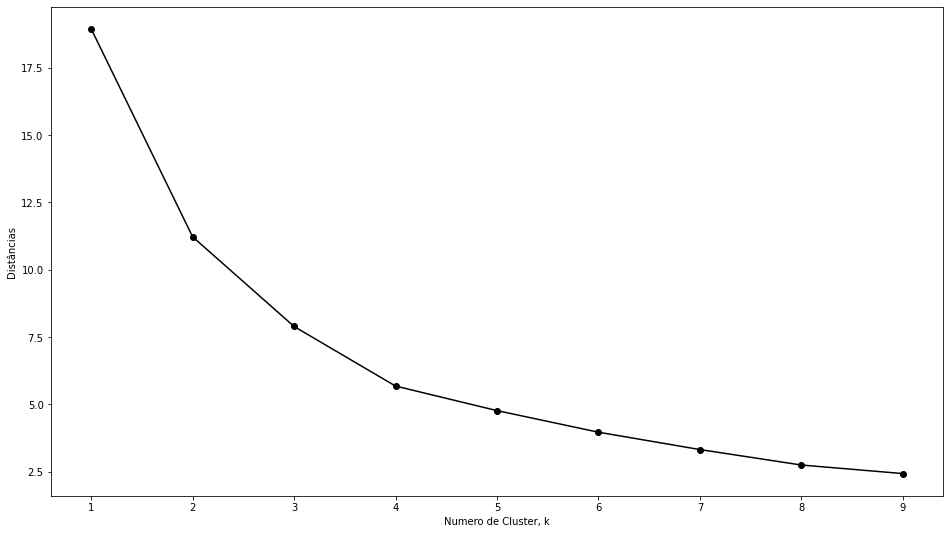

In [ ]:
#aplicando o curva do cootovelo para encontrar o número de clusters
ks = range(1, 10)
inertias = []
for k in ks:
    # Cria o obeto para modelo kmens para os testes
    model = KMeans(n_clusters=k)
    
    # Aplica nas componentes selecionadas (3 componentes)
    model.fit(X_std)
    
    # Adiciona os valores para a distância (agitação)
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('Numero de Cluster, k')
plt.ylabel('Distâncias')
plt.xticks(ks)
plt.show()

# **Aplicando o Kmeans**

In [ ]:
#transformando os dados em um dataframe
df_consumidores_norma=pd.DataFrame(X_std, columns=['Age','Annual Income (k$)','Spending Score (1-100)','Gender_cat'])

In [ ]:
df_consumidores_norma.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_cat
0,0.019231,0.000000,0.387755,1.0
1,0.057692,0.000000,0.816327,1.0
2,0.038462,0.008197,0.051020,0.0
3,0.096154,0.008197,0.775510,0.0
4,0.250000,0.016393,0.397959,0.0


In [ ]:
#realizando a aplicação do Kmeans
km = KMeans(n_clusters=4)  #instanciando o objeto com 4 clusters
clusters = km.fit_predict(df_consumidores_norma)
df_consumidores_norma["cluster"] = clusters
df_consumidores_norma.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_cat,cluster
0,0.019231,0.000000,0.387755,1.0,1
1,0.057692,0.000000,0.816327,1.0,1
2,0.038462,0.008197,0.051020,0.0,2
3,0.096154,0.008197,0.775510,0.0,3
4,0.250000,0.016393,0.397959,0.0,3


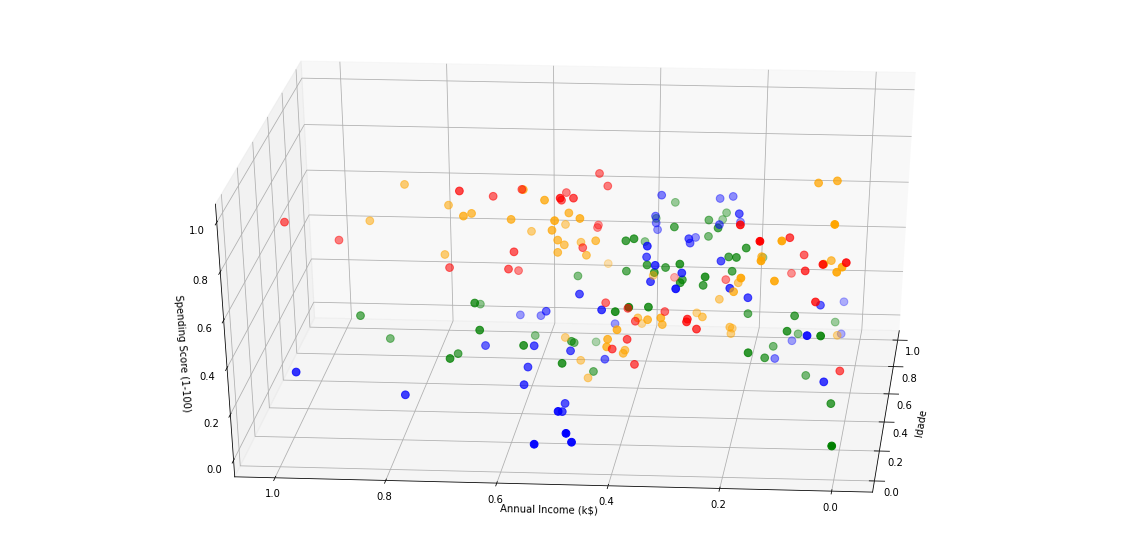

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
 
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_consumidores_norma.Age[df_consumidores_norma.cluster == 0], df_consumidores_norma["Annual Income (k$)"][df_consumidores_norma.cluster == 0], df_consumidores_norma["Spending Score (1-100)"][df_consumidores_norma.cluster == 0], c='blue', s=60)
ax.scatter(df_consumidores_norma.Age[df_consumidores_norma.cluster == 1], df_consumidores_norma["Annual Income (k$)"][df_consumidores_norma.cluster == 1], df_consumidores_norma["Spending Score (1-100)"][df_consumidores_norma.cluster == 1], c='red', s=60)
ax.scatter(df_consumidores_norma.Age[df_consumidores_norma.cluster == 2], df_consumidores_norma["Annual Income (k$)"][df_consumidores_norma.cluster == 2], df_consumidores_norma["Spending Score (1-100)"][df_consumidores_norma.cluster == 2], c='green', s=60)
ax.scatter(df_consumidores_norma.Age[df_consumidores_norma.cluster == 3], df_consumidores_norma["Annual Income (k$)"][df_consumidores_norma.cluster == 3], df_consumidores_norma["Spending Score (1-100)"][df_consumidores_norma.cluster == 3], c='orange', s=60)
ax.scatter(df_consumidores_norma.Age[df_consumidores_norma.cluster == 4], df_consumidores_norma["Annual Income (k$)"][df_consumidores_norma.cluster == 4], df_consumidores_norma["Spending Score (1-100)"][df_consumidores_norma.cluster == 4], c='purple', s=60)
ax.view_init(30, 185)
plt.xlabel("Idade")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

**Atribuindo nome aos bois**

In [ ]:
#retornando os dados
retorno=normaliza.inverse_transform(X_std)

In [ ]:
df_consumidores_retorno=pd.DataFrame(retorno, columns=['Age','Annual Income (k$)','Spending Score (1-100)','Gender_cat'])
df_consumidores_retorno["cluster"] = clusters

In [ ]:
df_consumidores_retorno.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_cat,cluster
0,19.0,15.0,39.0,1.0,1
1,21.0,15.0,81.0,1.0,1
2,20.0,16.0,6.0,0.0,2
3,23.0,16.0,77.0,0.0,3
4,31.0,17.0,40.0,0.0,3


In [ ]:
df_consumidores_retorno[df_consumidores_retorno['cluster']==2]

In [ ]:
df_consumidores_retorno.groupby('cluster').agg({'Age': ['mean'], 'Annual Income (k$)': ['median', 'min', 'mean'],'Spending Score (1-100)':['median', 'min', 'mean']})

Age Annual Income (k$)  ... Spending Score (1-100)           
              mean             median  ...                    min       mean
cluster                                ...                                  
0        49.437500               62.5  ...                    1.0  29.208333
1        28.250000               63.0  ...                   39.0  71.675000
2        48.109091               57.0  ...                    5.0  34.781818
3        28.438596               62.0  ...                   29.0  67.684211

[4 rows x 7 columns]

In [ ]:
#Homens=1
df_consumidores_retorno.groupby(['cluster','Gender_cat']).agg({'Age':'count'}).rename(columns={'Age':'Qtd'})

,,Qtd
cluster,Gender_cat,
0,1.0,48
1,1.0,40
2,0.0,55
3,0.0,57


In [ ]:
df_consumidores_retorno[(df_consumidores_retorno['cluster']==0)&(df_consumidores_retorno['Gender_cat']==0)]

,Age,Annual Income (k$),Spending Score (1-100),Gender_cat,cluster
